In [120]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from empyrical import max_drawdown, alpha, beta
from sklearn.preprocessing import MinMaxScaler
from src.asset_selector import AssetSelector
from src.indicators import Indicators
from util import time_formatter
from src.predictor import Predictor
from sklearn.cluster import KMeans
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import pandas as pd
import numpy as np
import configparser
import requests
import json
import time
import sys
import os

config = configparser.ConfigParser()
try:
    config.read(os.path.relpath("config.ini"))
except FileExistsError as e:
    print("FileExistsError: {}".format(e))
    sys.exit(1)
alpaca_api = tradeapi.REST(
    base_url    = config["alpaca"]["APCA_API_BASE_URL"],
    key_id      = config["alpaca"]["APCA_API_KEY_ID"],
    secret_key  = config["alpaca"]["APCA_API_SECRET_KEY"],
    api_version = config["alpaca"]["VERSION"]
)
trading_account = alpaca_api.get_account()
sid = SentimentIntensityAnalyzer()

In [121]:
def get_sentiment(text):
    """Given a text block, return a sentiment score based.

    :param text:
    :return:
    """
    text_polarity   = sid.polarity_scores(text)
    print(text_polarity)

    if text_polarity["compound"] > 0.50:
        sentiment   = "positive"

    else:
        sentiment   = "negative"

    return sentiment

def get_losers():
    
    print('Losers'.center(45))
    print()
    print('Symbol'.ljust(10), 'Last'.ljust(11), 'Change'.ljust(11), 'Pct Loss')
    print("{:<30}".format('–' * 45))
    for symbol in range(len(alpaca_api.polygon.gainers_losers("losers"))):
        print(alpaca_api.polygon.gainers_losers("losers")[symbol].ticker.ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers("losers")[symbol].lastTrade['p']).ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers("losers")[symbol].todaysChange).ljust(10),
              str(alpaca_api.polygon.gainers_losers("losers")[symbol].todaysChangePerc)+'%')
def get_gainers():
    print('Gainers'.center(45))
    print()
    print('Symbol'.ljust(10), 'Last'.ljust(11), 'Change'.ljust(11), 'Pct Gain')
    print("{:<30}".format('–' * 45))
    for symbol in range(len(alpaca_api.polygon.gainers_losers())):
        print(alpaca_api.polygon.gainers_losers()[symbol].ticker.ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers()[symbol].lastTrade['p']).ljust(10),
              '$' + str(alpaca_api.polygon.gainers_losers()[symbol].todaysChange).ljust(10),
              str(alpaca_api.polygon.gainers_losers()[symbol].todaysChangePerc)+'%')
        
if __name__ == '__main__':
    
    get_gainers()
    print()
    get_losers()

                   Gainers                   

Symbol     Last        Change      Pct Gain
–––––––––––––––––––––––––––––––––––––––––––––
  0         $17724127439749.12 $7648290843740.078 203.926%
FPAY       $2.48       $0.72       40.909%
EVER       $28.6       $6.83       31.373%
FLGT       $12.14      $2.74       29.149%
PAVM       $1.02       $0.145      16.571%
GEVO       $2.73       $0.34       14.226%
CHGG       $33.28      $3.95       13.467%
AGRX       $1.96       $0.18       10.112%
CCXI       $10.25      $0.89       9.509%
TECS       $9.93       $0.86       9.482%
RNG        $171.75     $14.1       8.944%
MGI        $3.69       $0.29       8.529%
RKDA       $5.55       $0.42       8.187%
VISL       $0.37       $0.028      8.187%
DFFN       $0.6998     $0.05       7.662%
NIO        $5.3        $0.37       7.602%
PBI        $5.3        $0.37       6.587%
USFD       $42.88      $1.24       6.422%
TTS        $1.75       $1.24       6.061%
TTS        $1.75       $1.49       6.054%

In [122]:
selector    = AssetSelector(alpaca_api, edgar_token=None)
assets      = selector.bullish_candlesticks(64, 20)

Ticker: BWB		Poolsize: 20		Result Length: 1
Ticker: SWIR		Poolsize: 20		Result Length: 2
Ticker: CERS		Poolsize: 20		Result Length: 3
Ticker: ECL		Poolsize: 20		Result Length: 4
Ticker: SBS		Poolsize: 20		Result Length: 5
Ticker: ARES		Poolsize: 20		Result Length: 6
Ticker: AMN		Poolsize: 20		Result Length: 7
Ticker: FTI		Poolsize: 20		Result Length: 8
Ticker: FIS		Poolsize: 20		Result Length: 9
Ticker: PFFD		Poolsize: 20		Result Length: 10
Ticker: VALE		Poolsize: 20		Result Length: 11
Ticker: PICO		Poolsize: 20		Result Length: 12
Ticker: CIH		Poolsize: 20		Result Length: 13
Ticker: TEVA		Poolsize: 20		Result Length: 14
Ticker: VREX		Poolsize: 20		Result Length: 15
Ticker: BKD		Poolsize: 20		Result Length: 16
Ticker: PRLB		Poolsize: 20		Result Length: 17
Ticker: RYI		Poolsize: 20		Result Length: 18
Ticker: ZUO		Poolsize: 20		Result Length: 19
Ticker: OXY		Poolsize: 20		Result Length: 20


In [123]:
ticker = "SGOL"

In [124]:
backdate = time_formatter(time.time() - (604800 * 13))

In [125]:
day_bars = selector.get_barset(ticker, "day", backdate)
day_bars = selector.extract_bar_data(day_bars, ticker)

In [126]:
minute_bars = selector.get_barset(ticker, "minute", backdate)
minute_bars = selector.extract_bar_data(minute_bars, ticker)

In [127]:
minute_bars.tail()

,time,open,high,low,close,volume
187,2019-11-04 10:37:00-05:00,14.540,14.540,14.540,14.540,300
188,2019-11-04 10:38:00-05:00,14.540,14.540,14.540,14.540,800
189,2019-11-04 10:43:00-05:00,14.530,14.530,14.530,14.530,500
190,2019-11-04 11:08:00-05:00,14.525,14.525,14.525,14.525,1
191,2019-11-04 14:14:00-05:00,14.520,14.520,14.520,14.520,100


In [128]:
alpaca_api.polygon.historic_trades(ticker, '2019-10-10', limit=10)
alpaca_api.polygon.news(ticker)
alpaca_api.polygon.last_trade(ticker)
alpaca_api.polygon.last_quote(ticker)
alpaca_api.polygon.company(ticker)
alpaca_api.polygon.dividends(ticker)

In [129]:
indicators  = Indicators(alpaca_api, assets)

In [130]:
results = requests.post("https://api.stocktwits.com/api/2/streams/symbol/{}.json".format(ticker))
results = json.loads(results.text)

In [131]:
results

{'response': {'status': 200},
 'symbol': {'id': 7944,
  'symbol': 'SGOL',
  'title': 'ETFS Gold Trust',
  'aliases': [],
  'is_following': False,
  'watchlist_count': 322},
 'cursor': {'more': True, 'since': 182423655, 'max': 176293496},
 'messages': [{'id': 182423655,
   'body': '$SGOL / ETFS GOLD Trust files form 8-K - Other Events https://fintel.io/s/us/sgol?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing',
   'created_at': '2019-11-04T17:39:46Z',
   'user': {'id': 127776,
    'username': 'risenhoover',
    'name': 'Wilton',
    'avatar_url': 'https://avatars.stocktwits.com/production/127776/thumb-1384448707.png',
    'avatar_url_ssl': 'https://avatars.stocktwits.com/production/127776/thumb-1384448707.png',
    'join_date': '2012-01-05',
    'official': False,
    'identity': 'User',
    'classification': [],
    'followers': 2408,
    'following': 27,
    'ideas': 405927,
    'watchlist_stocks_count': 1,
    'like_count': 1081,
    'plus_tier': '',
    'prem

In [132]:
bodies = "\n".join([m["body"] for m in results["messages"]])
bodies

'$SGOL / ETFS GOLD Trust files form 8-K - Other Events https://fintel.io/s/us/sgol?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing\nOnNovember  http://www.conferencecalltranscripts.org/8/summary2/?id=7001138 $SGOL\n$SGOL / ETFS GOLD Trust files form 424B3 https://fintel.io/filings/us/sgol?utm_source=stocktwits.com&amp;utm_medium=Social&amp;utm_campaign=filing\nETFS Gold Trust just filed a prospectus, suggesting it plans to soon issue some securities  http://www.conferencecalltranscripts.org/PROS/summary2/?id=6996237 $SGOL\nMountain Capital Investment Advisors Inc,has filed Form 13F for Q3 2019.Opened NEW positions in $NKTR $SGOL\nSimpliFi Inc.,has filed Form 13F for Q3 2019.Opened NEW positions in $SGOL $SUSC\nFinancial Services Advisory Inc,has filed Form 13F for Q3 2019.Opened NEW positions in $DEF $IAU $SGOL\n$SGOL / ETFS GOLD Trust files form 8-K - Financial Statements and Exhibits, Other Events https://fintel.io/s/us/sgol?utm_source=stocktwits.com&amp;utm_m

In [133]:
sentiment = get_sentiment(bodies)

{'neg': 0.031, 'neu': 0.838, 'pos': 0.13, 'compound': 0.9915}


In [134]:
sentiment

'positive'

In [135]:
indicators  = Indicators(alpaca_api, assets)

In [136]:
ticker_cluster = indicators.cluster_prep(ticker)

In [137]:
ticker_cluster

,time,open,high,low,close,volume,up_move,down_move,DMp,DMm,...,bb_low_ptc,macd_ptc,signal_ptc,vwmacd_ptc,vwsignal_ptc,mfi_ptc,stoch_ptc,vzo_ptc,apz_u_ptc,apz_l_ptc
0,2019-08-07 00:00:00-04:00,144.37,145.5200,143.0000,144.03,179030,NaN,NaN,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-08 00:00:00-04:00,143.99,145.4300,143.7609,144.88,91294,-0.0900,-0.7609,0.0000,0.0000,...,NaN,inf,inf,inf,inf,NaN,NaN,inf,0.001277,0.008088
2,2019-08-09 00:00:00-04:00,144.39,145.1000,144.0500,144.33,54857,-0.3300,-0.2891,0.0000,0.0000,...,NaN,-0.620139,-0.129610,-0.213228,0.170570,NaN,NaN,-0.755994,-0.003974,0.001889
3,2019-08-12 00:00:00-04:00,144.80,146.3600,144.6800,145.69,122128,1.2600,-0.6300,1.2600,0.0000,...,NaN,6.011178,1.527019,4.135531,1.765961,NaN,NaN,3.464172,0.002538,0.005776
4,2019-08-13 00:00:00-04:00,146.32,146.3700,142.5900,144.84,339080,0.0100,2.0900,0.0000,2.0900,...,NaN,-0.221117,0.207524,-0.470293,0.056482,NaN,NaN,-1.824142,0.000363,-0.001184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019-10-29 00:00:00-04:00,143.16,143.7700,142.2600,143.33,62471,-0.5600,1.1100,0.0000,1.1100,...,0.000716,0.184423,-0.060120,0.153665,0.010006,-0.224600,-0.259669,-1.333622,-0.000883,-0.000458
59,2019-10-30 00:00:00-04:00,143.58,144.2600,142.6700,144.08,95288,0.4900,-0.4100,0.4900,0.0000,...,-0.000030,-0.145897,-0.072886,-0.164113,-0.026198,0.353090,0.559701,-5.146351,0.000186,0.000490
60,2019-10-31 00:00:00-04:00,145.73,145.7769,145.3000,145.52,41024,1.5169,-2.6300,1.5169,0.0000,...,-0.000443,-0.722140,-0.161903,-0.348308,-0.083687,0.280694,0.672415,0.441736,0.001806,0.002294
61,2019-11-01 00:00:00-04:00,145.42,146.0180,145.1966,145.69,98510,0.2411,0.1034,0.2411,0.0000,...,-0.000594,-2.292652,-0.258759,-1.050063,-0.206355,0.084086,0.047108,0.609978,0.001733,0.002238


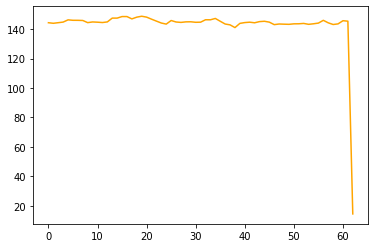

In [138]:
plt.plot(ticker_cluster["open"], color="orange")

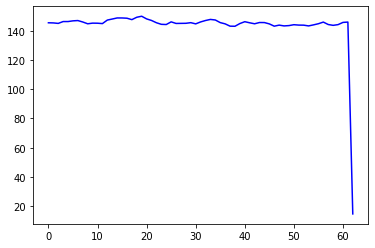

In [139]:
plt.plot(ticker_cluster["high"], color="blue")

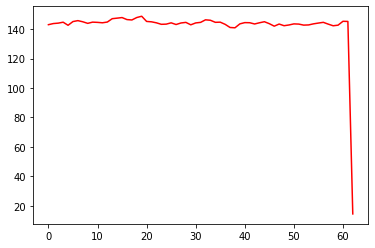

In [140]:
plt.plot(ticker_cluster["low"], color="red")

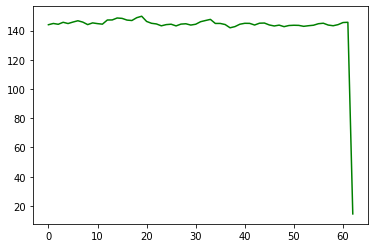

In [141]:
plt.plot(ticker_cluster["close"], color="green")

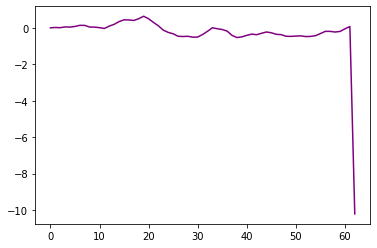

In [142]:
plt.plot(ticker_cluster["macd"], color="purple")

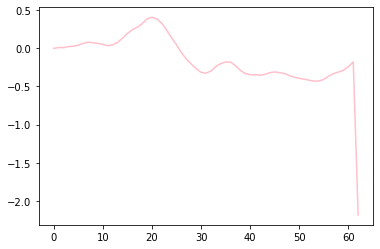

In [143]:
plt.plot(ticker_cluster["signal"], color="pink")

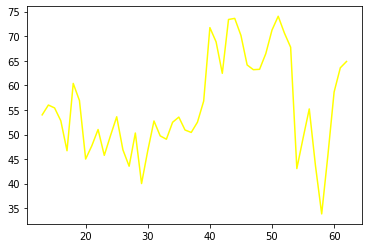

In [144]:
plt.plot(ticker_cluster["mfi"], color="yellow")

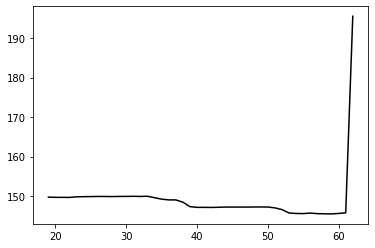

In [145]:
plt.plot(ticker_cluster["bb_up"], color="black")

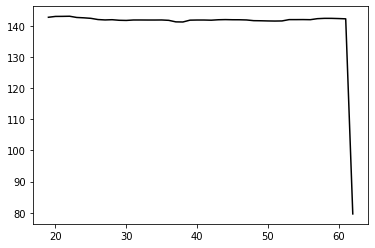

In [146]:
plt.plot(ticker_cluster["bb_low"], color="black")

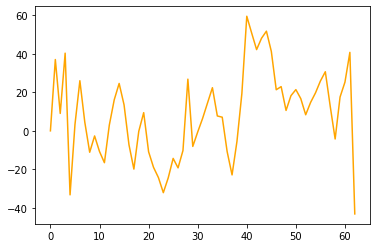

In [147]:
plt.plot(ticker_cluster["vzo"], color="orange")

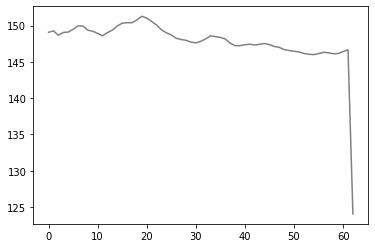

In [148]:
plt.plot(ticker_cluster["apz_u"], color="grey")

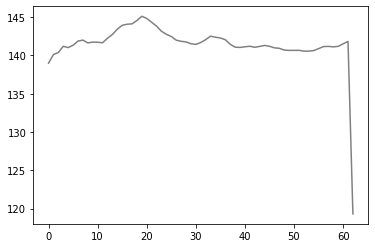

In [149]:
plt.plot(ticker_cluster["apz_l"], color="grey")

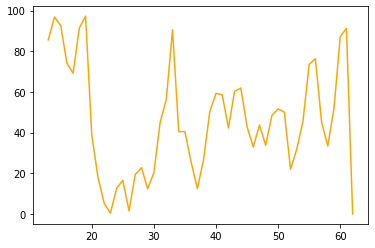

In [150]:
plt.plot(ticker_cluster["stoch"], color="orange")

In [151]:
# plt.plot(ticker_cluster["adx"], color="green")

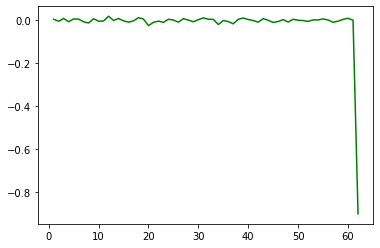

In [152]:
plt.plot(ticker_cluster["close"].pct_change(), color="green")

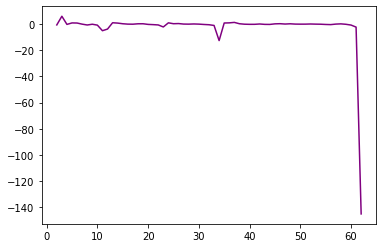

In [153]:
plt.plot(ticker_cluster["macd"].pct_change(), color="purple")

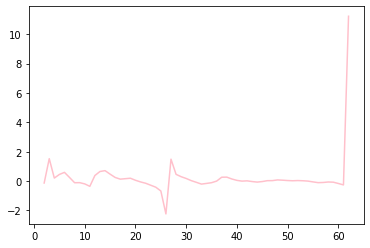

In [154]:
plt.plot(ticker_cluster["signal"].pct_change(), color="pink")

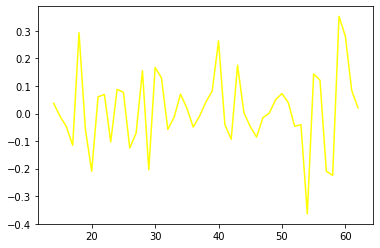

In [155]:
plt.plot(ticker_cluster["mfi"].pct_change(), color="yellow")

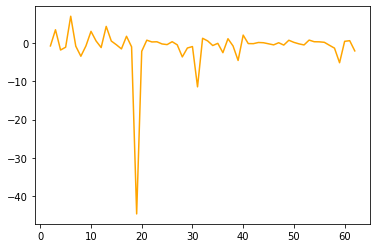

In [156]:
plt.plot(ticker_cluster["vzo"].pct_change(), color="orange")

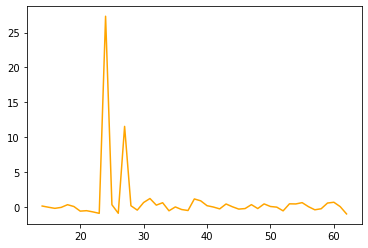

In [157]:
plt.plot(ticker_cluster["stoch"].pct_change(), color="orange")

In [158]:
vwap = indicators.get_vwap(minute_bars)

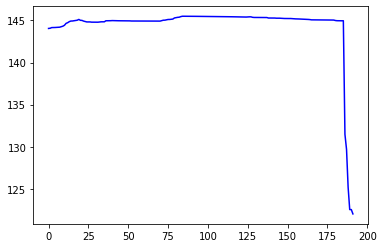

In [159]:
plt.plot(vwap, color="blue")

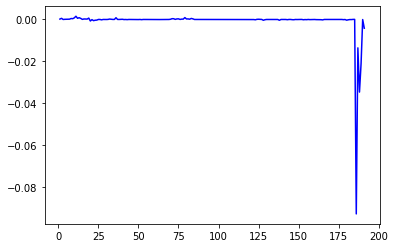

In [160]:
plt.plot(vwap.pct_change(), color="blue")

In [161]:
minute_macd = indicators.get_macd(minute_bars)

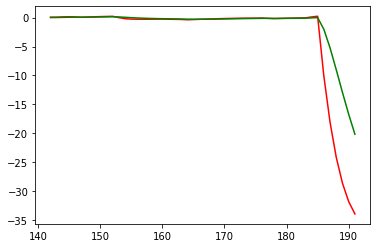

In [162]:
plt.plot(minute_macd["MACD"].iloc[-50:], color="red")
plt.plot(minute_macd["SIGNAL"].iloc[-50:], color="green")

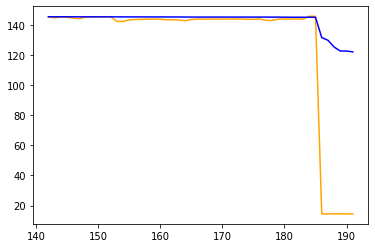

In [163]:
plt.plot(minute_bars["close"].iloc[-50:], color="orange")
plt.plot(vwap.iloc[-50:], color="blue")

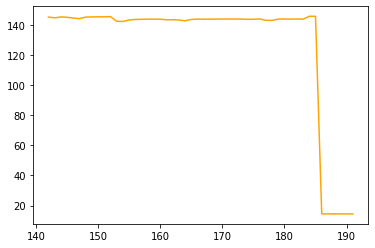

In [164]:
plt.plot(minute_bars["close"].iloc[-50:], color="orange")

In [165]:
# Feature Scaling Normalization
close_prices = pd.DataFrame(minute_bars["close"])
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(close_prices)

In [166]:
training_set_scaled

array([[9.57495565e-01],
       [9.58567416e-01],
       [9.59565346e-01],
       [9.57828208e-01],
       [9.58937020e-01],
       [9.59158782e-01],
       [9.59713187e-01],
       [9.62670018e-01],
       [9.64518037e-01],
       [9.64296274e-01],
       [9.65774690e-01],
       [9.74571260e-01],
       [9.72945003e-01],
       [9.68953282e-01],
       [9.69840331e-01],
       [9.70579539e-01],
       [9.70136014e-01],
       [9.71836192e-01],
       [9.69618569e-01],
       [9.69988173e-01],
       [9.62226493e-01],
       [9.60082791e-01],
       [9.50916617e-01],
       [9.46703134e-01],
       [9.55869308e-01],
       [9.55795387e-01],
       [9.57865169e-01],
       [9.62078652e-01],
       [9.62448255e-01],
       [9.61191603e-01],
       [9.62374335e-01],
       [9.64148433e-01],
       [9.75606150e-01],
       [9.70653459e-01],
       [9.71836192e-01],
       [9.72279716e-01],
       [9.78045535e-01],
       [9.76493199e-01],
       [9.75088705e-01],
       [9.66292135e-01],


In [48]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

IndexError: index 194 is out of bounds for axis 0 with size 194

In [167]:
spy_bars = selector.get_barset("SPY", "1D", backdate)
spy_bars = selector.extract_bar_data(spy_bars, "SPY")

In [168]:
# calculate the max drawdown
max_drawdown = max_drawdown(minute_bars["close"])
day_bars.iloc[-50:]

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/empyrical/stats.py:265: RuntimeWarning:

overflow encountered in multiply

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/empyrical/stats.py:394: RuntimeWarning:

invalid value encountered in subtract



,time,open,high,low,close,volume
13,2019-08-26 00:00:00-04:00,147.50,148.0900,147.0700,147.3000,108171
14,2019-08-27 00:00:00-04:00,147.50,148.8301,147.4400,148.6300,77971
15,2019-08-28 00:00:00-04:00,148.56,148.8200,147.8300,148.3700,65457
16,2019-08-29 00:00:00-04:00,148.55,148.6500,146.4600,147.2100,141848
17,2019-08-30 00:00:00-04:00,146.97,147.6800,146.2000,146.9100,106578
18,2019-09-03 00:00:00-04:00,148.15,149.3100,147.8600,148.8500,132670
19,2019-09-04 00:00:00-04:00,148.77,150.0000,148.7300,149.8300,74818
20,2019-09-05 00:00:00-04:00,148.17,148.1800,145.2100,146.2762,153327
21,2019-09-06 00:00:00-04:00,146.78,147.1100,144.9400,145.0000,71204
22,2019-09-09 00:00:00-04:00,145.46,145.5500,144.2600,144.5600,48073


In [169]:
spy_bars.iloc[-50:]

,time,open,high,low,close,volume
13,2019-08-26 00:00:00-04:00,287.27,287.9900,285.5800,287.9700,55417381
14,2019-08-27 00:00:00-04:00,289.54,289.9500,286.0300,286.8400,57062542
15,2019-08-28 00:00:00-04:00,286.14,289.0700,285.2500,288.8400,50136080
16,2019-08-29 00:00:00-04:00,291.72,293.1600,290.6100,292.5600,46853904
17,2019-08-30 00:00:00-04:00,294.22,294.2399,291.4200,292.4527,49059839
18,2019-09-03 00:00:00-04:00,290.57,291.5800,289.2700,290.7750,52837823
19,2019-09-04 00:00:00-04:00,293.14,294.0550,292.3100,293.9700,38261914
20,2019-09-05 00:00:00-04:00,296.79,298.8300,294.0010,297.8200,68516970
21,2019-09-06 00:00:00-04:00,298.17,298.7600,297.4200,298.0700,39903355
22,2019-09-09 00:00:00-04:00,299.14,299.2400,297.1600,298.1500,43663086


In [170]:
# calculate alpha and beta
alpha = alpha(minute_bars["close"], spy_bars["close"])
beta = beta(minute_bars["close"], spy_bars["close"])

/home/ben/anaconda3/envs/alpaca_test/lib/python3.7/site-packages/empyrical/stats.py:1294: RuntimeWarning:

overflow encountered in power



In [172]:
beta

-0.04066575907153181